In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import kerastuner as kt
from sklearn.model_selection import train_test_split
import seaborn as sns


def plot_curve(epochs, hist, list_of_metrics,name):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    plt.figure()
    plt.xlabel("Epoch "+name)
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
    plt.legend()
    
    
def create_model_optimizer(hp):
    model = tf.keras.models.Sequential()
    
   
    
    

    first_layer=hp.Int(str('1_units'), min_value = 32, max_value = 64, step = 8)
    model.add(tf.keras.layers.Dense(units = first_layer, activation = 'relu'))
    
    second_layer=hp.Int(str('2_units'), min_value = 64, max_value = 256, step = 16)
    model.add(tf.keras.layers.Dense(units = second_layer, activation = 'relu'))

    third_layer=hp.Int(str('3_units'), min_value = 128, max_value = 2048, step = 128)
    model.add(tf.keras.layers.Dense(units = third_layer, activation = 'relu'))

    fourth_layer=hp.Int(str('4_units'), min_value = 512, max_value = 4096, step = 256)
    model.add(tf.keras.layers.Dense(units = fourth_layer, activation = 'relu'))

    fith_layer=hp.Int(str('5_units'), min_value = 128, max_value = 512, step = 32)
    model.add(tf.keras.layers.Dense(units = fith_layer, activation = 'relu'))


    six_layer=hp.Int(str('6_units'), min_value = 32, max_value = 128, step = 16)
    model.add(tf.keras.layers.Dense(units = six_layer, activation = 'relu'))



        
    hp_lr=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_momentum=hp.Choice('momentum', values=[1e-2, 1e-1, 2e-1,5e-1])

    model.add(tf.keras.layers.Dense(units=15,name='Output', activation = 'relu'))                             
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=hp_lr,momentum=hp_momentum),                                       
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
    return model


def train_model(model,x_data, y_data, epochs, label_name,
                batch_size=None,shuffle=True):
    #features = {name:np.array(value) for name, value in dataset.items()}
    history = model.fit(x=x_data, y=y_data, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle,validation_split=0.2,
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])
  
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist
    
    
#returns dataframe
def test_model(model,x_data, y_data ,label_name):
    evaluation=model.evaluate(x = x_data, y = y_data, batch_size=100)
    predicted = model.predict(x_data)
    df_test=pd.DataFrame(y_data,columns=[label_name])
   # print(predicted)
    df_predict=pd.DataFrame(predicted,columns=[label+"_pred" for label in label_name])
    return pd.concat([df_test,df_predict], axis=1)



In [6]:

all_labels_features=["delta","lambda","all_maxima","Intensity","overlap_s0_s2_k6a","overlap_s0_s2_k1","overlap_s0_s2_k9a"]
all_data=pd.read_csv("G:\OneDrive - bwedu\Master\Forschungspraktikum\Inga\pc-forschi\generated_Data/all_param_4_values_with_overlap.csv")
df_feature_labels=all_data[all_labels_features]

max_no_of_peak_list=max(all_data["no_of_max"])
print(max_no_of_peak_list)
df_feature_labels.head()

7


,delta,lambda,all_maxima,Intensity,overlap_s0_s2_k6a,overlap_s0_s2_k1,overlap_s0_s2_k9a
0,0.6000,0.1000,[0.466 0.54 0.612 0.67 0.742],[104.475076 104.507572 87.7231385 58.12209...,"[0.5232, 0.3386, 0.1098, 0.0239, 0.004]","[0.7501, 0.2155, 0.031, 0.003, 0.0002]","[0.8102, 0.1704, 0.018, 0.0013, 0.0001]"
1,0.6000,0.2333,[0.51 0.584 0.65 0.712 0.778],[121.232278 120.055307 85.8745546 56.17655...,"[0.5232, 0.3386, 0.1098, 0.0239, 0.004]","[0.7501, 0.2155, 0.031, 0.003, 0.0002]","[0.9769, 0.0228, 0.0003, 0.0, 0.0]"
2,0.6000,0.2333,[0.482 0.556 0.628 0.686 0.756],[101.883081 101.900808 85.5862194 56.79913...,"[0.5232, 0.3386, 0.1098, 0.0239, 0.004]","[0.7501, 0.2155, 0.031, 0.003, 0.0002]","[0.8102, 0.1704, 0.018, 0.0013, 0.0001]"
3,0.5333,0.2333,[0.418 0.492 0.564 0.622 0.692],[101.197996 101.175315 85.035938 56.43656...,"[0.5232, 0.3386, 0.1098, 0.0239, 0.004]","[0.7501, 0.2155, 0.031, 0.003, 0.0002]","[0.8102, 0.1704, 0.018, 0.0013, 0.0001]"
4,0.5333,0.1000,[0.4 0.474 0.546 0.604 0.676],[104.345828 104.372914 87.6137903 58.09441...,"[0.5232, 0.3386, 0.1098, 0.0239, 0.004]","[0.7501, 0.2155, 0.031, 0.003, 0.0002]","[0.8102, 0.1704, 0.018, 0.0013, 0.0001]"


In [7]:
#convert string lists into numpy arrays in dict

all_maxima_array=np.asarray([  np.asarray([x for x in row.replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["all_maxima"] ])

intensity_array=np.asarray([  np.asarray([x for x in row.replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["Intensity"] ])

overlap_s0_s2_k6a_array=np.asarray([  np.asarray([x for x in row.replace(",","").replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["overlap_s0_s2_k6a"] ])

overlap_s0_s2_k1_array=np.asarray([  np.asarray([x for x in row.replace(",","").replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["overlap_s0_s2_k1"] ])

overlap_s0_s2_k9a_array=np.asarray([  np.asarray([x for x in row.replace(",","").replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["overlap_s0_s2_k9a"] ])

H:\Users\Gwydion\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [8]:
#pad all_maxima_array and intensity_array
all_maxima_array_padded=np.zeros((len(all_maxima_array),max_no_of_peak_list))
intensity_array_padded=np.zeros((len(intensity_array),max_no_of_peak_list))

for i in range(len(all_maxima_array)):
    for j in range(len(all_maxima_array[i])):
        all_maxima_array_padded[i][j]=all_maxima_array[i][j]
        intensity_array_padded[i][j]=intensity_array[i][j]


In [9]:
concat_label=np.concatenate((overlap_s0_s2_k6a_array,overlap_s0_s2_k1_array,overlap_s0_s2_k9a_array),axis=1)
concat_feature=np.concatenate((all_maxima_array_padded,intensity_array_padded),axis=1)

x_train, x_test,y_train,y_test = train_test_split( concat_feature, concat_label  ,test_size=0.20, random_state=42)


In [ ]:
MAX_TRIALS = 2

EXECUTIONS_PER_TRIAL = 1

tuner = kt.RandomSearch(

    create_model_optimizer,

    objective='val_mean_absolute_error',

    max_trials=MAX_TRIALS,

    executions_per_trial=EXECUTIONS_PER_TRIAL,

    directory='franck_condon_test',
    #overwrite = True,
    project_name='fourth Try',

    seed=12

)

tuner.search(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))


Epoch 1/10


 839/1637 [==============>...............] - ETA: 0s - loss: 0.8396 - mean_absolute_error: 0.839 - ETA: 13s - loss: 0.4546 - mean_absolute_error: 0.45 - ETA: 14s - loss: 0.3267 - mean_absolute_error: 0.32 - ETA: 15s - loss: 0.2822 - mean_absolute_error: 0.28 - ETA: 15s - loss: 0.2547 - mean_absolute_error: 0.25 - ETA: 15s - loss: 0.2364 - mean_absolute_error: 0.23 - ETA: 15s - loss: 0.2241 - mean_absolute_error: 0.22 - ETA: 15s - loss: 0.2131 - mean_absolute_error: 0.21 - ETA: 15s - loss: 0.2060 - mean_absolute_error: 0.20 - ETA: 15s - loss: 0.2003 - mean_absolute_error: 0.20 - ETA: 15s - loss: 0.1959 - mean_absolute_error: 0.19 - ETA: 15s - loss: 0.1912 - mean_absolute_error: 0.19 - ETA: 15s - loss: 0.1870 - mean_absolute_error: 0.18 - ETA: 15s - loss: 0.1833 - mean_absolute_error: 0.18 - ETA: 14s - loss: 0.1797 - mean_absolute_error: 0.17 - ETA: 14s - loss: 0.1769 - mean_absolute_error: 0.17 - ETA: 14s - loss: 0.1736 - mean_absolute_error: 0.17 - ETA: 14s - loss: 0.1709 - mean_absolu

1637/1637 [==============================] - ETA: 7s - loss: 0.0629 - mean_absolute_error: 0.062 - ETA: 7s - loss: 0.0627 - mean_absolute_error: 0.062 - ETA: 7s - loss: 0.0625 - mean_absolute_error: 0.062 - ETA: 7s - loss: 0.0623 - mean_absolute_error: 0.062 - ETA: 7s - loss: 0.0622 - mean_absolute_error: 0.062 - ETA: 7s - loss: 0.0620 - mean_absolute_error: 0.062 - ETA: 7s - loss: 0.0618 - mean_absolute_error: 0.061 - ETA: 7s - loss: 0.0616 - mean_absolute_error: 0.061 - ETA: 7s - loss: 0.0615 - mean_absolute_error: 0.061 - ETA: 7s - loss: 0.0613 - mean_absolute_error: 0.061 - ETA: 7s - loss: 0.0611 - mean_absolute_error: 0.061 - ETA: 7s - loss: 0.0610 - mean_absolute_error: 0.061 - ETA: 7s - loss: 0.0608 - mean_absolute_error: 0.060 - ETA: 6s - loss: 0.0606 - mean_absolute_error: 0.060 - ETA: 6s - loss: 0.0605 - mean_absolute_error: 0.060 - ETA: 6s - loss: 0.0604 - mean_absolute_error: 0.060 - ETA: 6s - loss: 0.0602 - mean_absolute_error: 0.060 - ETA: 6s - loss: 0.0601 - mean_absolut

 827/1637 [==============>...............] - ETA: 0s - loss: 0.0347 - mean_absolute_error: 0.034 - ETA: 13s - loss: 0.0345 - mean_absolute_error: 0.03 - ETA: 14s - loss: 0.0339 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0337 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0337 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0335 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0335 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0338 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0338 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0337 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0338 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0338 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0338 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0338 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0338 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0337 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0337 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0338 - mean_absolu

1636/1637 [============================>.] - ETA: 7s - loss: 0.0328 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0328 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0328 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolute_error: 0.032 - ETA: 7s - loss: 0.0327 - mean_absolut

1637/1637 [==============================] - 18s 11ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312
Epoch 3/10


 802/1637 [=============>................] - ETA: 0s - loss: 0.0328 - mean_absolute_error: 0.032 - ETA: 13s - loss: 0.0312 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0315 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0312 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0310 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0311 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0312 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0314 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0313 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0312 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0311 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0312 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0312 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0313 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0312 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0311 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0311 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0312 - mean_absolu

1637/1637 [==============================] - ETA: 8s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 8s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 8s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 8s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 8s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 8s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 7s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 7s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 7s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 7s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 7s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 7s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 7s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 7s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 7s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 7s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 7s - loss: 0.0306 - mean_absolute_error: 0.030 - ETA: 7s - loss: 0.0306 - mean_absolut

Epoch 4/10


 833/1637 [==============>...............] - ETA: 0s - loss: 0.0292 - mean_absolute_error: 0.029 - ETA: 13s - loss: 0.0299 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0309 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0305 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0303 - mean_absolute_error: 0.03 - ETA: 15s - loss: 0.0299 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0298 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0298 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0296 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0296 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0296 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0296 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0296 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0295 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0296 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0296 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0297 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0297 - mean_absolu

1637/1637 [==============================] - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 7s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 6s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 6s - loss: 0.0295 - mean_absolute_error: 0.029 - ETA: 6s - loss: 0.0295 - mean_absolut

 851/1637 [==============>...............] - ETA: 0s - loss: 0.0280 - mean_absolute_error: 0.028 - ETA: 13s - loss: 0.0290 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0281 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0279 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0285 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0287 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0287 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0289 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0287 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0286 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0287 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0287 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0287 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0287 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0287 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0288 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0288 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0287 - mean_absolu

1637/1637 [==============================] - ETA: 7s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 7s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 7s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 7s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 7s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 7s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 7s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 7s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 7s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 7s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 7s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 6s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 6s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 6s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 6s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 6s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 6s - loss: 0.0286 - mean_absolute_error: 0.028 - ETA: 6s - loss: 0.0286 - mean_absolut

 822/1637 [==============>...............] - ETA: 0s - loss: 0.0275 - mean_absolute_error: 0.027 - ETA: 13s - loss: 0.0279 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0278 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0275 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0275 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0274 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0275 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0275 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0276 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0277 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0279 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0280 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0281 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0281 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0281 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0281 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0281 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0281 - mean_absolu

1637/1637 [==============================] - ETA: 7s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0278 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0278 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0278 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0278 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0278 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0278 - mean_absolut

 848/1637 [==============>...............] - ETA: 0s - loss: 0.0279 - mean_absolute_error: 0.027 - ETA: 13s - loss: 0.0280 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0274 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0272 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0273 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0275 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0274 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0273 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0272 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0273 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0273 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0273 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0272 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0271 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0271 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0271 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0272 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0272 - mean_absolu

1637/1637 [==============================] - ETA: 7s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 7s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 6s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 6s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 6s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 6s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 6s - loss: 0.0271 - mean_absolute_error: 0.027 - ETA: 6s - loss: 0.0271 - mean_absolut

 822/1637 [==============>...............] - ETA: 0s - loss: 0.0236 - mean_absolute_error: 0.023 - ETA: 13s - loss: 0.0266 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0266 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0272 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0273 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0270 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0271 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0271 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0271 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0269 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0268 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0268 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0268 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0267 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0266 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0267 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0267 - mean_absolute_error: 0.02 - ETA: 14s - loss: 0.0267 - mean_absolu

1625/1637 [============================>.] - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolute_error: 0.026 - ETA: 7s - loss: 0.0267 - mean_absolut

1637/1637 [==============================] - ETA: 0s - loss: 0.0266 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0266 - mean_absolute_error: 0.026 - 18s 11ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262
Epoch 9/10


 755/1637 [============>.................] - ETA: 0s - loss: 0.0257 - mean_absolute_error: 0.025 - ETA: 13s - loss: 0.0270 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0271 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0273 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0271 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0268 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0267 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0266 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0265 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0265 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0265 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0266 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0265 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0264 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0264 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0263 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0262 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0262 - mean_absolu

1548/1637 [===========================>..] - ETA: 9s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 9s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 9s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 9s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 9s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 9s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 9s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 8s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 8s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 8s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 8s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 8s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 8s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 8s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 8s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 8s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 8s - loss: 0.0262 - mean_absolute_error: 0.026 - ETA: 8s - loss: 0.0262 - mean_absolut

1637/1637 [==============================] - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.026 - 18s 11ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - val_loss: 0.0260 - val_mean_ab

 800/1637 [=============>................] - ETA: 0s - loss: 0.0244 - mean_absolute_error: 0.024 - ETA: 13s - loss: 0.0268 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0262 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0260 - mean_absolute_error: 0.02 - ETA: 16s - loss: 0.0258 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0259 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0260 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0260 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0260 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0260 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0260 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0259 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0260 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0259 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0260 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0260 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0260 - mean_absolute_error: 0.02 - ETA: 15s - loss: 0.0260 - mean_absolu

1597/1637 [============================>.] - ETA: 8s - loss: 0.0259 - mean_absolute_error: 0.025 - ETA: 8s - loss: 0.0259 - mean_absolute_error: 0.025 - ETA: 8s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 8s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 8s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 8s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 8s - loss: 0.0259 - mean_absolute_error: 0.025 - ETA: 7s - loss: 0.0259 - mean_absolute_error: 0.025 - ETA: 7s - loss: 0.0259 - mean_absolute_error: 0.025 - ETA: 7s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 7s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 7s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 7s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 7s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 7s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 7s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 7s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 7s - loss: 0.0258 - mean_absolut

1637/1637 [==============================] - ETA: 0s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 0s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 0s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 0s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 0s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 0s - loss: 0.0258 - mean_absolute_error: 0.025 - ETA: 0s - loss: 0.0258 - mean_absolute_error: 0.025 - 18s 11ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - val_loss: 0.0257 - val_mean_absolute_error: 0.0257


Epoch 1/10


 301/1637 [====>.........................] - ETA: 0s - loss: 0.8345 - mean_absolute_error: 0.834 - ETA: 30s - loss: 0.7256 - mean_absolute_error: 0.72 - ETA: 38s - loss: 0.6238 - mean_absolute_error: 0.62 - ETA: 40s - loss: 0.5311 - mean_absolute_error: 0.53 - ETA: 41s - loss: 0.4662 - mean_absolute_error: 0.46 - ETA: 42s - loss: 0.4140 - mean_absolute_error: 0.41 - ETA: 43s - loss: 0.3731 - mean_absolute_error: 0.37 - ETA: 43s - loss: 0.3404 - mean_absolute_error: 0.34 - ETA: 44s - loss: 0.3154 - mean_absolute_error: 0.31 - ETA: 44s - loss: 0.2944 - mean_absolute_error: 0.29 - ETA: 44s - loss: 0.2781 - mean_absolute_error: 0.27 - ETA: 44s - loss: 0.2636 - mean_absolute_error: 0.26 - ETA: 45s - loss: 0.2517 - mean_absolute_error: 0.25 - ETA: 45s - loss: 0.2414 - mean_absolute_error: 0.24 - ETA: 45s - loss: 0.2323 - mean_absolute_error: 0.23 - ETA: 45s - loss: 0.2245 - mean_absolute_error: 0.22 - ETA: 45s - loss: 0.2177 - mean_absolute_error: 0.21 - ETA: 45s - loss: 0.2115 - mean_absolu

 603/1637 [==========>...................] - ETA: 40s - loss: 0.1174 - mean_absolute_error: 0.11 - ETA: 40s - loss: 0.1173 - mean_absolute_error: 0.11 - ETA: 40s - loss: 0.1172 - mean_absolute_error: 0.11 - ETA: 40s - loss: 0.1171 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1170 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1170 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1169 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1168 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1167 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1166 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1165 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1164 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1163 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1163 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1162 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1162 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1161 - mean_absolute_error: 0.11 - ETA: 39s - loss: 0.1160 - mean_absolu

 905/1637 [===============>..............] - ETA: 31s - loss: 0.1107 - mean_absolute_error: 0.11 - ETA: 31s - loss: 0.1107 - mean_absolute_error: 0.11 - ETA: 31s - loss: 0.1106 - mean_absolute_error: 0.11 - ETA: 31s - loss: 0.1106 - mean_absolute_error: 0.11 - ETA: 31s - loss: 0.1106 - mean_absolute_error: 0.11 - ETA: 31s - loss: 0.1106 - mean_absolute_error: 0.11 - ETA: 31s - loss: 0.1106 - mean_absolute_error: 0.11 - ETA: 31s - loss: 0.1106 - mean_absolute_error: 0.11 - ETA: 30s - loss: 0.1105 - mean_absolute_error: 0.11 - ETA: 30s - loss: 0.1105 - mean_absolute_error: 0.11 - ETA: 30s - loss: 0.1105 - mean_absolute_error: 0.11 - ETA: 30s - loss: 0.1105 - mean_absolute_error: 0.11 - ETA: 30s - loss: 0.1104 - mean_absolute_error: 0.11 - ETA: 30s - loss: 0.1104 - mean_absolute_error: 0.11 - ETA: 30s - loss: 0.1104 - mean_absolute_error: 0.11 - ETA: 30s - loss: 0.1104 - mean_absolute_error: 0.11 - ETA: 30s - loss: 0.1104 - mean_absolute_error: 0.11 - ETA: 30s - loss: 0.1103 - mean_absolu

1207/1637 [=====================>........] - ETA: 22s - loss: 0.1083 - mean_absolute_error: 0.10 - ETA: 22s - loss: 0.1083 - mean_absolute_error: 0.10 - ETA: 22s - loss: 0.1083 - mean_absolute_error: 0.10 - ETA: 22s - loss: 0.1083 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1083 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1083 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1083 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1082 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1082 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1082 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1082 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1082 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1082 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1082 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1082 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1082 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1082 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1081 - mean_absolu

1509/1637 [==========================>...] - ETA: 12s - loss: 0.1071 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1071 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1071 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1071 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1071 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1071 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1071 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1071 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1071 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1071 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1071 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1070 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1070 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1070 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1070 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1070 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1070 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1070 - mean_absolu

1637/1637 [==============================] - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 3s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 2s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 2s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 2s - loss: 0.1063 - mean_absolute_error: 0.106 - ETA: 2s - loss: 0.1062 - mean_absolute_error: 0.106 - ETA: 2s - loss: 0.1062 - mean_absolut

 301/1637 [====>.........................] - ETA: 0s - loss: 0.1048 - mean_absolute_error: 0.104 - ETA: 28s - loss: 0.1059 - mean_absolute_error: 0.10 - ETA: 35s - loss: 0.1061 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1060 - mean_absolute_error: 0.10 - ETA: 40s - loss: 0.1052 - mean_absolute_error: 0.10 - ETA: 41s - loss: 0.1045 - mean_absolute_error: 0.10 - ETA: 42s - loss: 0.1038 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1034 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1036 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1039 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1039 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1040 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1041 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1039 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1039 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1039 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1039 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1039 - mean_absolu

 603/1637 [==========>...................] - ETA: 38s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1029 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1030 - mean_absolu

 905/1637 [===============>..............] - ETA: 30s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1028 - mean_absolu

1207/1637 [=====================>........] - ETA: 21s - loss: 0.1027 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1027 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1027 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1027 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1027 - mean_absolu

1509/1637 [==========================>...] - ETA: 12s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1026 - mean_absolu

1637/1637 [==============================] - ETA: 3s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1027 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1027 - mean_absolut

 301/1637 [====>.........................] - ETA: 0s - loss: 0.1028 - mean_absolute_error: 0.102 - ETA: 35s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 40s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 42s - loss: 0.1037 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1037 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1035 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1029 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1033 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1034 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1036 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1033 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1035 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1035 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1035 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1034 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1035 - mean_absolu

 603/1637 [==========>...................] - ETA: 39s - loss: 0.1027 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1027 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1028 - mean_absolu

 905/1637 [===============>..............] - ETA: 30s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1027 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1026 - mean_absolu

1207/1637 [=====================>........] - ETA: 21s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1025 - mean_absolu

1509/1637 [==========================>...] - ETA: 12s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1024 - mean_absolu

1637/1637 [==============================] - ETA: 3s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1024 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1024 - mean_absolut

 301/1637 [====>.........................] - ETA: 0s - loss: 0.1077 - mean_absolute_error: 0.107 - ETA: 30s - loss: 0.1065 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1041 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 41s - loss: 0.1026 - mean_absolute_error: 0.10 - ETA: 42s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1029 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1027 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1023 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1023 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1023 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1023 - mean_absolu

 603/1637 [==========>...................] - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolu

 905/1637 [===============>..............] - ETA: 30s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1021 - mean_absolu

1207/1637 [=====================>........] - ETA: 21s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1022 - mean_absolu

1509/1637 [==========================>...] - ETA: 12s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1021 - mean_absolu

1637/1637 [==============================] - ETA: 3s - loss: 0.1021 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1021 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1021 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1021 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1021 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1021 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1021 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1021 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1022 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1022 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1022 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1022 - mean_absolute_error: 0.102 - ETA: 3s - loss: 0.1022 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1022 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1022 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1022 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1022 - mean_absolute_error: 0.102 - ETA: 2s - loss: 0.1022 - mean_absolut

 301/1637 [====>.........................] - ETA: 0s - loss: 0.1026 - mean_absolute_error: 0.102 - ETA: 30s - loss: 0.1008 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1009 - mean_absolute_error: 0.10 - ETA: 40s - loss: 0.1010 - mean_absolute_error: 0.10 - ETA: 41s - loss: 0.1010 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1009 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1007 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1012 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1012 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1015 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1022 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1023 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1022 - mean_absolu

 603/1637 [==========>...................] - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolu

 905/1637 [===============>..............] - ETA: 30s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolu

1207/1637 [=====================>........] - ETA: 21s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolu

1509/1637 [==========================>...] - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolu

1637/1637 [==============================] - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1019 - mean_absolut

 301/1637 [====>.........................] - ETA: 0s - loss: 0.1033 - mean_absolute_error: 0.103 - ETA: 29s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 36s - loss: 0.1023 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 41s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 42s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1015 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1015 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1015 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1013 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1021 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1022 - mean_absolu

 603/1637 [==========>...................] - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1020 - mean_absolu

 905/1637 [===============>..............] - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 28s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 28s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 28s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 28s - loss: 0.1019 - mean_absolu

1207/1637 [=====================>........] - ETA: 21s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1019 - mean_absolu

1509/1637 [==========================>...] - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1019 - mean_absolu

1637/1637 [==============================] - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1019 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1019 - mean_absolut

 301/1637 [====>.........................] - ETA: 0s - loss: 0.1004 - mean_absolute_error: 0.100 - ETA: 29s - loss: 0.1014 - mean_absolute_error: 0.10 - ETA: 35s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1011 - mean_absolute_error: 0.10 - ETA: 40s - loss: 0.1015 - mean_absolute_error: 0.10 - ETA: 41s - loss: 0.1015 - mean_absolute_error: 0.10 - ETA: 42s - loss: 0.1010 - mean_absolute_error: 0.10 - ETA: 42s - loss: 0.1009 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1009 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1008 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1012 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1012 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1009 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1013 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1014 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1014 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1015 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1015 - mean_absolu

 603/1637 [==========>...................] - ETA: 38s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1017 - mean_absolu

 905/1637 [===============>..............] - ETA: 30s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1016 - mean_absolu

1207/1637 [=====================>........] - ETA: 21s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1016 - mean_absolu

1509/1637 [==========================>...] - ETA: 12s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1016 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1016 - mean_absolu

1637/1637 [==============================] - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1017 - mean_absolut

 301/1637 [====>.........................] - ETA: 0s - loss: 0.1137 - mean_absolute_error: 0.113 - ETA: 29s - loss: 0.1081 - mean_absolute_error: 0.10 - ETA: 36s - loss: 0.1062 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1057 - mean_absolute_error: 0.10 - ETA: 41s - loss: 0.1055 - mean_absolute_error: 0.10 - ETA: 41s - loss: 0.1044 - mean_absolute_error: 0.10 - ETA: 42s - loss: 0.1037 - mean_absolute_error: 0.10 - ETA: 43s - loss: 0.1037 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1035 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1033 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1029 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1030 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1028 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1025 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1024 - mean_absolute_error: 0.10 - ETA: 44s - loss: 0.1024 - mean_absolu

 603/1637 [==========>...................] - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 38s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1020 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 37s - loss: 0.1019 - mean_absolu

 905/1637 [===============>..............] - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 28s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 28s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 28s - loss: 0.1017 - mean_absolu

1207/1637 [=====================>........] - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1018 - mean_absolu

1509/1637 [==========================>...] - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolu

1637/1637 [==============================] - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 3s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1017 - mean_absolut

 301/1637 [====>.........................] - ETA: 0s - loss: 0.0946 - mean_absolute_error: 0.094 - ETA: 31s - loss: 0.0947 - mean_absolute_error: 0.09 - ETA: 38s - loss: 0.0980 - mean_absolute_error: 0.09 - ETA: 41s - loss: 0.0987 - mean_absolute_error: 0.09 - ETA: 43s - loss: 0.0996 - mean_absolute_error: 0.09 - ETA: 44s - loss: 0.1003 - mean_absolute_error: 0.10 - ETA: 45s - loss: 0.1007 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1010 - mean_absolute_error: 0.10 - ETA: 46s - loss: 0.1004 - mean_absolute_error: 0.10 - ETA: 47s - loss: 0.1003 - mean_absolute_error: 0.10 - ETA: 47s - loss: 0.1005 - mean_absolute_error: 0.10 - ETA: 47s - loss: 0.1006 - mean_absolute_error: 0.10 - ETA: 47s - loss: 0.1010 - mean_absolute_error: 0.10 - ETA: 47s - loss: 0.1013 - mean_absolute_error: 0.10 - ETA: 47s - loss: 0.1014 - mean_absolute_error: 0.10 - ETA: 47s - loss: 0.1014 - mean_absolute_error: 0.10 - ETA: 47s - loss: 0.1015 - mean_absolute_error: 0.10 - ETA: 47s - loss: 0.1015 - mean_absolu

 603/1637 [==========>...................] - ETA: 40s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 40s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 40s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 40s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1019 - mean_absolute_error: 0.10 - ETA: 39s - loss: 0.1019 - mean_absolu

 905/1637 [===============>..............] - ETA: 30s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 30s - loss: 0.1018 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 29s - loss: 0.1017 - mean_absolu

1207/1637 [=====================>........] - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 21s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 20s - loss: 0.1017 - mean_absolu

1247/1637 [=====================>........] - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 12s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolute_error: 0.10 - ETA: 11s - loss: 0.1017 - mean_absolu

In [ ]:
tuner.results_summary()


In [ ]:
tuner.oracle.get_best_trials(num_trials=2)[0].hyperparameters.values

In [ ]:
tuner.oracle.get_best_trials(num_trials=2)[1].hyperparameters.values

In [ ]:
best_model = tuner.get_best_models()[0]


In [ ]:
all_label_list=['k6a 0',"k6a 1","k6a 2","k6a 3","k6a 4","k1 0","k1 1","k1 2","k1 3","k1 4","k9a 0","k9a 1","k9a 2","k9a 3","k9a 4"]

delta_test_result=test_model(best_model,x_test,y_test,all_label_list)

columns_names=delta_test_result.columns

compare_k6a=columns_names[[0,1,2,3,4,15,16,17,18,19]]
compare_k1=columns_names[[5,6,7,8,9,20,21,22,23,24]]
compare_k9a=columns_names[[10,11,12,13,14,25,26,27,28,29]]
#print(compare_k6a)

#delta_test_result[compare_k6a].head(50)
#delta_test_result[compare_k1].head(50)
delta_test_result[compare_k9a].head(50)

In [13]:
delta_test_result[compare_k9a].corr()

,"(k9a 0,)","(k9a 1,)","(k9a 2,)","(k9a 3,)","(k9a 4,)",k9a 0_pred,k9a 1_pred,k9a 2_pred,k9a 3_pred,k9a 4_pred
"(k9a 0,)",1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.803040,-0.774371,NaN,NaN,NaN
"(k9a 1,)",-1.000000,1.000000,1.000000,1.000000,1.000000,-0.803040,0.774371,NaN,NaN,NaN
"(k9a 2,)",-1.000000,1.000000,1.000000,1.000000,1.000000,-0.803040,0.774371,NaN,NaN,NaN
"(k9a 3,)",-1.000000,1.000000,1.000000,1.000000,1.000000,-0.803040,0.774371,NaN,NaN,NaN
"(k9a 4,)",-1.000000,1.000000,1.000000,1.000000,1.000000,-0.803040,0.774371,NaN,NaN,NaN
k9a 0_pred,0.803040,-0.803040,-0.803040,-0.803040,-0.803040,1.000000,-0.678326,NaN,NaN,NaN
k9a 1_pred,-0.774371,0.774371,0.774371,0.774371,0.774371,-0.678326,1.000000,NaN,NaN,NaN
k9a 2_pred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k9a 3_pred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k9a 4_pred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

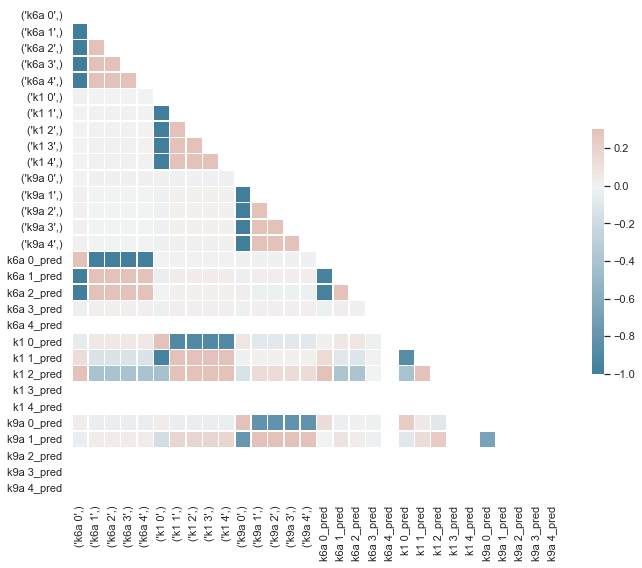

In [14]:

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = delta_test_result
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#my_model.save("saved_Models/lambda_100_best_model_main_max_err_0_0027")

In [19]:

epochs_run, hist = train_model(best_model,x_train, y_train, 50, 
                          all_label_list, 100)


Epoch 1/50


363/419 [========================>.....] - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 7s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_

363/419 [========================>.....] - ETA: 0s - loss: 0.0083 - mean_absolute_error: 0.008 - ETA: 7s - loss: 0.0099 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_

419/419 [==============================] - ETA: 1s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0097 - mean_absolute_

329/419 [======================>.......] - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 7s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_

361/419 [========================>.....] - ETA: 0s - loss: 0.0086 - mean_absolute_error: 0.008 - ETA: 7s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_

419/419 [==============================] - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_

353/419 [========================>.....] - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 7s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_

361/419 [========================>.....] - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 7s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_

419/419 [==============================] - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0095 - mean_absolute_

352/419 [========================>.....] - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 6s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_

369/419 [=========================>....] - ETA: 0s - loss: 0.0103 - mean_absolute_error: 0.010 - ETA: 7s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0093 - mean_absolute_

419/419 [==============================] - ETA: 1s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0094 - mean_absolute_

356/419 [========================>.....] - ETA: 0s - loss: 0.0100 - mean_absolute_error: 0.010 - ETA: 7s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_

375/419 [=========================>....] - ETA: 0s - loss: 0.0088 - mean_absolute_error: 0.008 - ETA: 6s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_

419/419 [==============================] - ETA: 1s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.009 - 11s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - val_loss: 0.0098 - val_mean_abso

356/419 [========================>.....] - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 7s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_

316/419 [=====================>........] - ETA: 0s - loss: 0.0098 - mean_absolute_error: 0.009 - ETA: 7s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0100 - mean_absolute_error: 0.010 - ETA: 8s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0097 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_

419/419 [==============================] - ETA: 2s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 2s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 2s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 2s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 2s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 2s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 2s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 2s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 2s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 2s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 2s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 2s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0093 - mean_absolute_

331/419 [======================>.......] - ETA: 0s - loss: 0.0098 - mean_absolute_error: 0.009 - ETA: 7s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_

368/419 [=========================>....] - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 7s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 8s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0093 - mean_absolute_

419/419 [==============================] - ETA: 1s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0092 - mean_absolute_

370/419 [=========================>....] - ETA: 0s - loss: 0.0096 - mean_absolute_error: 0.009 - ETA: 7s - loss: 0.0101 - mean_absolute_error: 0.010 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0091 - mean_absolute_

369/419 [=========================>....] - ETA: 0s - loss: 0.0101 - mean_absolute_error: 0.010 - ETA: 7s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0092 - mean_absolute_

419/419 [==============================] - ETA: 1s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_

369/419 [=========================>....] - ETA: 0s - loss: 0.0100 - mean_absolute_error: 0.010 - ETA: 7s - loss: 0.0087 - mean_absolute_error: 0.008 - ETA: 8s - loss: 0.0085 - mean_absolute_error: 0.008 - ETA: 8s - loss: 0.0087 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0088 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0088 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0090 - mean_absolute_

364/419 [=========================>....] - ETA: 0s - loss: 0.0095 - mean_absolute_error: 0.009 - ETA: 7s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 8s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 8s - loss: 0.0090 - mean_absolute_

419/419 [==============================] - ETA: 1s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0091 - mean_absolute_

369/419 [=========================>....] - ETA: 0s - loss: 0.0086 - mean_absolute_error: 0.008 - ETA: 7s - loss: 0.0088 - mean_absolute_error: 0.008 - ETA: 8s - loss: 0.0088 - mean_absolute_error: 0.008 - ETA: 8s - loss: 0.0088 - mean_absolute_error: 0.008 - ETA: 8s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0090 - mean_absolute_

349/419 [=======================>......] - ETA: 0s - loss: 0.0082 - mean_absolute_error: 0.008 - ETA: 6s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_

419/419 [==============================] - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 1s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0090 - mean_absolute_

376/419 [=========================>....] - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 7s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0094 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0093 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0088 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 8s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 8s - loss: 0.0089 - mean_absolute_

352/419 [========================>.....] - ETA: 0s - loss: 0.0098 - mean_absolute_error: 0.009 - ETA: 7s - loss: 0.0092 - mean_absolute_error: 0.009 - ETA: 8s - loss: 0.0088 - mean_absolute_error: 0.008 - ETA: 8s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0088 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0088 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0088 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0091 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 9s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 8s - loss: 0.0089 - mean_absolute_

419/419 [==============================] - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 1s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_

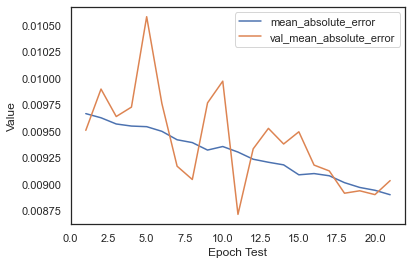

In [20]:
list_of_metrics_to_plot = ['mean_absolute_error',"val_mean_absolute_error"] 
plot_curve(epochs_run, hist, list_of_metrics_to_plot,"Test")


In [23]:
all_label_list=['k6a 0',"k6a 1","k6a 2","k6a 3","k6a 4","k1 0","k1 1","k1 2","k1 3","k1 4","k9a 0","k9a 1","k9a 2","k9a 3","k9a 4"]

delta_test_result=test_model(best_model,x_test,y_test,all_label_list)
columns_names=delta_test_result.columns

compare_k6a=columns_names[[0,1,2,3,4,15,16,17,18,19]]
compare_k1=columns_names[[5,6,7,8,9,20,21,22,23,24]]
compare_k9a=columns_names[[10,11,12,13,14,25,26,27,28,29]]
#print(compare_k6a)

delta_test_result[compare_k6a].head(50)
#delta_test_result[compare_k1].head(50)
#delta_test_result[compare_k9a].head(50)

131/131 [==============================] - ETA: 0s - loss: 0.0088 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0087 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0090 - mean_absolute_error: 0.009 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - ETA: 0s - loss: 0.0089 - mean_absolute_error: 0.008 - 1s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089


,"(k6a 0,)","(k6a 1,)","(k6a 2,)","(k6a 3,)","(k6a 4,)",k6a 0_pred,k6a 1_pred,k6a 2_pred,k6a 3_pred,k6a 4_pred
0,0.9307,0.0669,0.0024,0.0001,0.000,0.852158,0.085549,0.000000,0.0,0.0
1,0.9307,0.0669,0.0024,0.0001,0.000,0.901470,0.073640,0.000000,0.0,0.0
2,0.9307,0.0669,0.0024,0.0001,0.000,0.906233,0.082181,0.000000,0.0,0.0
3,0.9307,0.0669,0.0024,0.0001,0.000,0.910683,0.081683,0.000000,0.0,0.0
4,0.9307,0.0669,0.0024,0.0001,0.000,0.910759,0.081740,0.000000,0.0,0.0
5,0.9307,0.0669,0.0024,0.0001,0.000,0.924916,0.070287,0.000000,0.0,0.0
6,0.5232,0.3386,0.1098,0.0239,0.004,0.525116,0.338782,0.107106,0.0,0.0
7,0.9307,0.0669,0.0024,0.0001,0.000,0.934037,0.065172,0.000000,0.0,0.0
8,0.9307,0.0669,0.0024,0.0001,0.000,0.917462,0.073104,0.000000,0.0,0.0
9,0.9307,0.0669,0.0024,0.0001,0.000,0.884813,0.077649,0.000000,0.0,0.0


In [24]:
best_model.save("saved_Models/franck_condon_best_model_main_max_err_0_009")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_Models/franck_condon_best_model_main_max_err_0_009\assets
